#### Importing Libraries

In [ ]:
import pandas as pd 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn import tree
from matplotlib import pyplot as plt

: 

#### Reading Data

In [10]:
data = pd.read_csv("./Final Database - Final.csv")

<h4> Data Description </h4>
<h6> Youtube DataSet</h6>

##### Data Columns

In [11]:
data.columns

Index(['Video_Title', 'Channel_title', 'Publish_Time', 'tags', 'views',
       'Trending_NonTrending', 'likes', 'dislikes', 'comment_count',
       'Comment Disabled', 'Description'],
      dtype='object')

In [12]:
data.head()

,Video_Title,Channel_title,Publish_Time,tags,views,Trending_NonTrending,likes,dislikes,comment_count,Comment Disabled,Description
0,1 REASON WHY | RishhSome,Rishhsome,2018-06-05T14:29:11.000Z,"rishhsome|""vines""|""rishabh rana""|""rishabh""|""fu...",398035.0,0.0,28138.0,1710.0,1251.0,False,Watch my latest video!ACTORS:Rishabh RanaVikra...
1,1 Stupidity vs 1000 Stupidity,Slayy Point,2018-05-31T11:17:17.000Z,"slayy point|""1$ vs 1000$""|""1$ vs 100$ videos""|...",166769.0,0.0,20022.0,661.0,2435.0,False,Download Cuddll - https://ubj2g.app.goo.gl/spW...
2,10 AWESOME LIFE HACKS!,Power Vision,2018-05-28T13:45:00.000Z,"Life hacks|""Coca-Cola""|""Lifehacks""|""Coca-Cola ...",792386.0,0.0,3468.0,937.0,201.0,False,Help Me +2.100.000 Subscribers: https://goo.gl...
3,10 DIY Giant vs Miniature Gadgets / School Pra...,Troom Troom,2018-05-27T14:00:09.000Z,"prank|""pranks""|""best pranks""|""funny""|""joke""|""h...",1270168.0,1.0,20418.0,1410.0,2593.0,False,Subscribe Here: https://goo.gl/KM3Axw8 DIY Edi...
4,10th Annual Vijay Awards | 16th & 17th June 20...,Vijay Television,2018-06-13T06:38:30.000Z,"Thamizh|""Vijay""|""Star""|""Vijay TV""|""Star TV""|""S...",540577.0,0.0,4382.0,397.0,224.0,False,10th Annual Vijay Awards! ஜூன் 16 இரவு 8 மணிக்...


In [5]:
data.shape

(1831, 11)

##### Checking is there any NULL values in data

In [6]:
data[data.isnull().any(axis = 1)].head()

,Video_Title,Channel_title,Publish_Time,tags,views,Trending_NonTrending,likes,dislikes,comment_count,Comment Disabled,Description
110,ABP ANANDA Live Stream,ABP ANANDA,2018-05-17T06:39:03.000Z,[none],133305.0,0.0,439.0,89.0,32.0,False,NaN
232,Baat Ka Batangad,Irahul Vohra,2017-11-11T13:15:51.000Z,"Baat Ka Batangad|""Truth""|""Truth Behind The Rel...",70810.0,0.0,3768.0,191.0,257.0,False,NaN
259,Bepannaah: Mon-Fri 9.30 pm.,ColorsTV Promos,2018-06-06T08:48:27.000Z,"colors tv|""colorstv""|""hindi serials""",312621.0,0.0,3700.0,68.0,219.0,False,NaN
262,Best Moments Of Chennai Super Kings Team After...,Tv Actor's Real,2018-05-28T03:52:01.000Z,[none],94768.0,0.0,698.0,57.0,25.0,False,NaN
263,Best Moments Of Chennai Super Kings Team After...,Tv Actor's Real,2018-05-28T03:52:01.000Z,[none],141262.0,0.0,864.0,80.0,30.0,False,NaN


<h5> Data Cleaning </h5>

In [14]:
data = data.dropna()

In [15]:
data.shape

(1803, 11)

In [16]:
# For creating additional feature -> Trending-NonTrending
dataframe = data.copy()

# Defining our Target Variable/feature
dataframe['Trending_NonTrending'] = (dataframe['views'] > 500000) * 1
dataframe['Trending_NonTrending'].head()

0    0
1    0
2    1
3    1
4    1
Name: Trending_NonTrending, dtype: int32

In [17]:
# Creating Target Variable 
Y = dataframe['Trending_NonTrending'].copy()
Y.head()

0    0
1    0
2    1
3    1
4    1
Name: Trending_NonTrending, dtype: int32

In [18]:
features_list = ['likes', 'dislikes','comment_count']

X = dataframe[features_list].copy()
X.columns

Index(['likes', 'dislikes', 'comment_count'], dtype='object')

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 324)

In [20]:
# Creating a Decision Tree Classifier and Training the Model

video_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
video_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [21]:
y_prediction = video_classifier.predict(x_test)

[Text(0.5357142857142857, 0.9166666666666666, 'X[1] <= 504.5\ngini = 0.394\nsamples = 1262\nvalue = [921, 341]'),
 Text(0.2857142857142857, 0.75, 'X[0] <= 11737.0\ngini = 0.102\nsamples = 873\nvalue = [826, 47]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[1] <= 282.5\ngini = 0.057\nsamples = 822\nvalue = [798, 24]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.011\nsamples = 707\nvalue = [703, 4]'),
 Text(0.21428571428571427, 0.4166666666666667, 'gini = 0.287\nsamples = 115\nvalue = [95, 20]'),
 Text(0.42857142857142855, 0.5833333333333334, 'X[2] <= 659.0\ngini = 0.495\nsamples = 51\nvalue = [28, 23]'),
 Text(0.35714285714285715, 0.4166666666666667, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.5, 0.4166666666666667, 'X[0] <= 20828.5\ngini = 0.455\nsamples = 40\nvalue = [26, 14]'),
 Text(0.42857142857142855, 0.25, 'gini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.5714285714285714, 0.25, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.78571428571

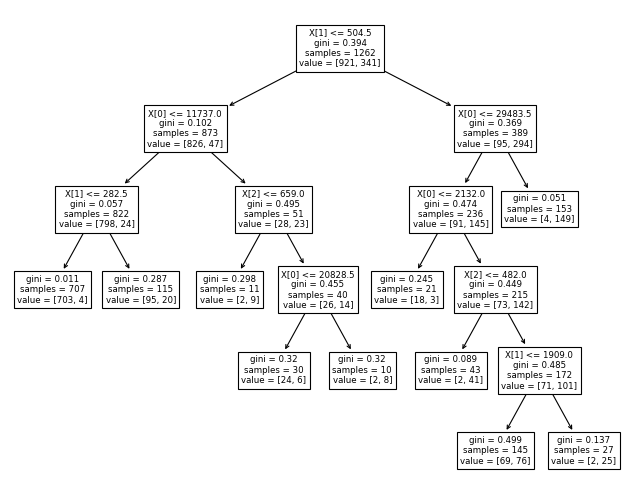

In [22]:
fig = figure(figsize=(10, 8), dpi = 80)
tree.plot_tree(video_classifier)

In [23]:
accuracy_score(y_test, y_prediction)*100

87.61552680221811

In [24]:
confusion_matrix(y_test, y_prediction)

array([[346,  41],
       [ 26, 128]], dtype=int64)